Null Value Analysis of tehe Data after Handling the missing data

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
import seaborn as sns

In [ ]:
df = pd.read_csv('linreg_use.csv')
df

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions,%_expenditure_gdp,Unnamed: 9
0,Australia,2010,93.199532,72.798973,22.09754243,4.140552,0.901227,1146138465604,5.550060,NaN
1,Australia,2011,93.608101,74.061668,23.37206897,4.600276,0.939168,1396649906339,5.074510,NaN
2,Australia,2012,94.448936,76.483017,24.64659551,5.060001,0.977109,1546151783873,4.869000,NaN
3,Australia,2013,91.080772,72.036842,26.74360085,5.756980,0.985780,1576184467015,5.229740,NaN
4,Australia,2014,91.450500,71.233940,24.94644928,5.324850,0.934080,1467483705132,5.164770,NaN
...,...,...,...,...,...,...,...,...,...,...
455,West Bank and Gaza,2015,60.398998,39.021870,17.12458992,1.604140,0.210680,13972400000,5.141360,NaN
456,West Bank and Gaza,2016,61.101990,39.635609,17.58827972,1.559250,0.210260,15405400000,5.717730,NaN
457,West Bank and Gaza,2017,62.976317,41.116795,18.35334595,1.578140,0.228594,15789169600,5.052367,NaN
458,West Bank and Gaza,2018,64.245369,42.601688,19.08675957,1.701170,0.255140,16276600000,4.916038,NaN


In [ ]:
#removing the extra column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions,%_expenditure_gdp
0,Australia,2010,93.199532,72.798973,22.09754243,4.140552,0.901227,1146138465604,5.550060
1,Australia,2011,93.608101,74.061668,23.37206897,4.600276,0.939168,1396649906339,5.074510
2,Australia,2012,94.448936,76.483017,24.64659551,5.060001,0.977109,1546151783873,4.869000
3,Australia,2013,91.080772,72.036842,26.74360085,5.756980,0.985780,1576184467015,5.229740
4,Australia,2014,91.450500,71.233940,24.94644928,5.324850,0.934080,1467483705132,5.164770
...,...,...,...,...,...,...,...,...,...
455,West Bank and Gaza,2015,60.398998,39.021870,17.12458992,1.604140,0.210680,13972400000,5.141360
456,West Bank and Gaza,2016,61.101990,39.635609,17.58827972,1.559250,0.210260,15405400000,5.717730
457,West Bank and Gaza,2017,62.976317,41.116795,18.35334595,1.578140,0.228594,15789169600,5.052367
458,West Bank and Gaza,2018,64.245369,42.601688,19.08675957,1.701170,0.255140,16276600000,4.916038


In [ ]:
# Finding countries with no doctoral values
doctoral_null = df[df['DoctoralAttainment'].isna()]
doctoral_null.head()


,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions,%_expenditure_gdp
60,Bulgaria,2010,93.219612,69.614952,20.71764946,NaN,NaN,50381825504,3.882390
61,Bulgaria,2011,93.735329,70.653168,20.80995941,NaN,NaN,57386216850,3.566430
62,Bulgaria,2012,94.303680,72.480858,21.51111984,NaN,NaN,54033250329,3.494850
63,Bulgaria,2013,94.326637,73.937958,22.91971016,NaN,NaN,55615397666,4.074200
64,Bulgaria,2014,94.245163,73.813087,24.06306076,NaN,NaN,56901994980,4.487609


In [ ]:
# Countries with no doctoral values.

countries_to_remove = doctoral_null['Country Name'].unique()
print(countries_to_remove)

['Bulgaria' 'Chile' 'Colombia' 'Ecuador' 'Honduras' 'Kuwait' 'Singapore'
 'Uzbekistan']


In [ ]:
# Removing countries with no doctoral attainment
df_new = df[~df['Country Name'].isin(countries_to_remove)]
print(df_new['DoctoralAttainment'].isna().sum(), 'Null values for Doctoral')

0 Null values for Doctoral


In [ ]:
print(df_new['MastersAttainment'].isna().sum(), "null values for Masters")

# As we can see, removing doctoral null values removed countries with null values in masters attainment too.
# This shows that all the countries with no Masters Attainment values didnt have any Doctoral attainment values associated with them too.

0 null values for Masters


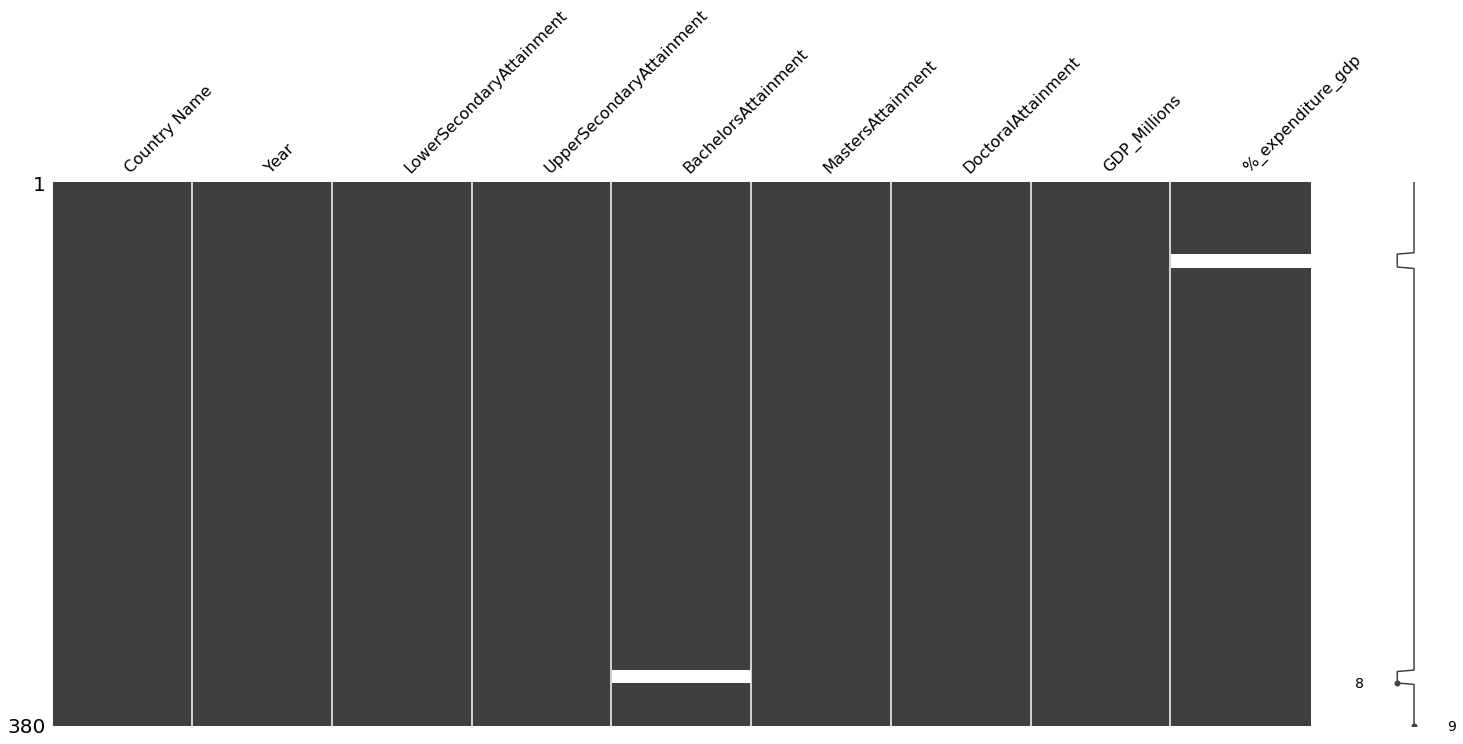

In [ ]:
msno.matrix(df_new)

# we notice some null values for bachelors and % expenditure as well.

In [ ]:
df_new[df_new['BachelorsAttainment'].isna()]

# Notice that Turkey has no values for Bachelors Attainemnt, droping the Country


,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions,%_expenditure_gdp
411,Turkey,2011,49.748131,31.798670,NaN,1.170752,0.29631,838762755164,4.303
412,Turkey,2012,51.137131,32.766258,NaN,1.327744,0.31297,880556375780,4.200
413,Turkey,2013,52.675320,33.758511,NaN,1.552820,0.34356,957783020853,4.387
414,Turkey,2014,54.967758,35.237419,NaN,1.636200,0.35078,938952628604,4.606
415,Turkey,2015,56.354900,37.073559,NaN,1.756160,0.33863,864316670331,4.257
416,Turkey,2016,58.864441,37.656700,NaN,1.785080,0.35906,869692960366,4.165
417,Turkey,2017,60.893318,39.026699,NaN,2.263340,0.42272,858996263096,4.328
418,Turkey,2018,62.671897,40.393729,NaN,2.269696,0.41293,778377023569,4.256
419,Turkey,2019,64.620461,41.667219,NaN,2.426688,0.42959,761428183369,3.663


In [ ]:
df_attain_final = df_new[~df_new['BachelorsAttainment'].isna()]
df_attain_final

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions,%_expenditure_gdp
0,Australia,2010,93.199532,72.798973,22.09754243,4.140552,0.901227,1146138465604,5.550060
1,Australia,2011,93.608101,74.061668,23.37206897,4.600276,0.939168,1396649906339,5.074510
2,Australia,2012,94.448936,76.483017,24.64659551,5.060001,0.977109,1546151783873,4.869000
3,Australia,2013,91.080772,72.036842,26.74360085,5.756980,0.985780,1576184467015,5.229740
4,Australia,2014,91.450500,71.233940,24.94644928,5.324850,0.934080,1467483705132,5.164770
...,...,...,...,...,...,...,...,...,...
455,West Bank and Gaza,2015,60.398998,39.021870,17.12458992,1.604140,0.210680,13972400000,5.141360
456,West Bank and Gaza,2016,61.101990,39.635609,17.58827972,1.559250,0.210260,15405400000,5.717730
457,West Bank and Gaza,2017,62.976317,41.116795,18.35334595,1.578140,0.228594,15789169600,5.052367
458,West Bank and Gaza,2018,64.245369,42.601688,19.08675957,1.701170,0.255140,16276600000,4.916038


In [ ]:
# Check countries with null values in % exp

countries_to_remove_exp = list(df_attain_final[df_attain_final['%_expenditure_gdp'].isna()]['Country Name'].unique())
countries_to_remove_exp

['Bosnia and Herzegovina']

In [ ]:
df_final = df_attain_final[~df_attain_final['Country Name'].isin(countries_to_remove_exp)]
df_final

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions,%_expenditure_gdp
0,Australia,2010,93.199532,72.798973,22.09754243,4.140552,0.901227,1146138465604,5.550060
1,Australia,2011,93.608101,74.061668,23.37206897,4.600276,0.939168,1396649906339,5.074510
2,Australia,2012,94.448936,76.483017,24.64659551,5.060001,0.977109,1546151783873,4.869000
3,Australia,2013,91.080772,72.036842,26.74360085,5.756980,0.985780,1576184467015,5.229740
4,Australia,2014,91.450500,71.233940,24.94644928,5.324850,0.934080,1467483705132,5.164770
...,...,...,...,...,...,...,...,...,...
455,West Bank and Gaza,2015,60.398998,39.021870,17.12458992,1.604140,0.210680,13972400000,5.141360
456,West Bank and Gaza,2016,61.101990,39.635609,17.58827972,1.559250,0.210260,15405400000,5.717730
457,West Bank and Gaza,2017,62.976317,41.116795,18.35334595,1.578140,0.228594,15789169600,5.052367
458,West Bank and Gaza,2018,64.245369,42.601688,19.08675957,1.701170,0.255140,16276600000,4.916038


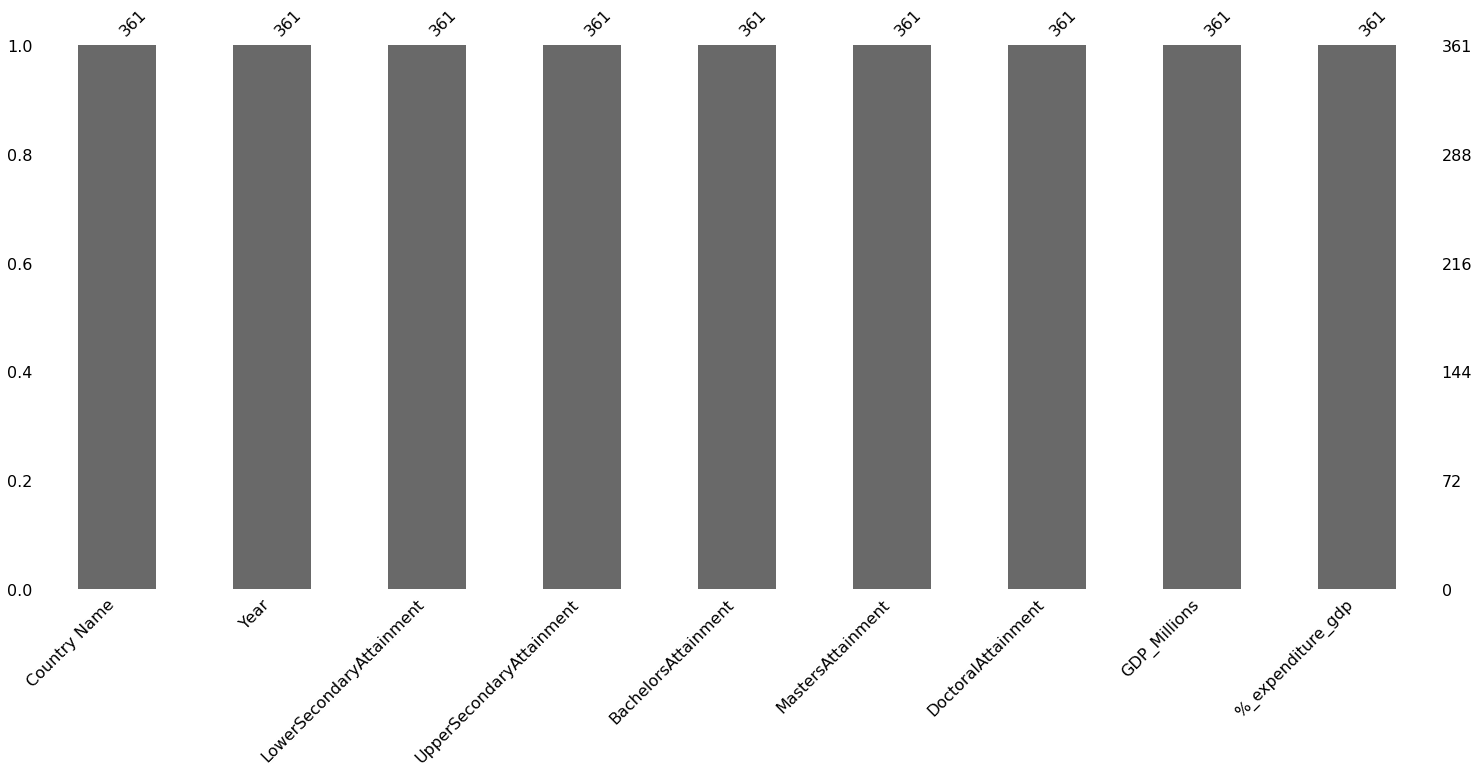

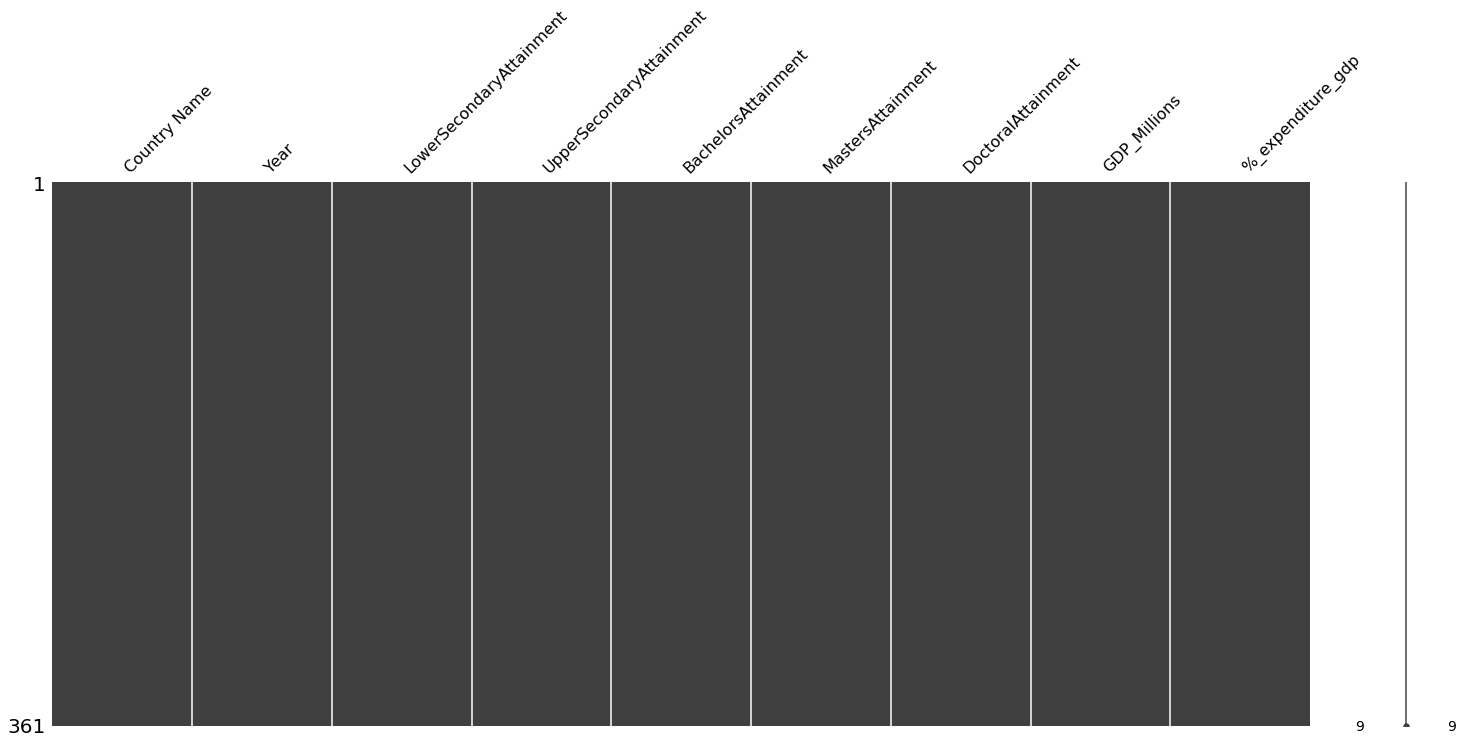

In [ ]:
# Visualizing the nullity of the Data
msno.bar(df_final)
msno.matrix(df_final)

In [ ]:
print(len(df_final['Country Name'].unique()), 'Countries to work with')

37 Countries to work with


In [ ]:
df_final

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions,%_expenditure_gdp
0,Australia,2010,93.199532,72.798973,22.09754243,4.140552,0.901227,1146138465604,5.550060
1,Australia,2011,93.608101,74.061668,23.37206897,4.600276,0.939168,1396649906339,5.074510
2,Australia,2012,94.448936,76.483017,24.64659551,5.060001,0.977109,1546151783873,4.869000
3,Australia,2013,91.080772,72.036842,26.74360085,5.756980,0.985780,1576184467015,5.229740
4,Australia,2014,91.450500,71.233940,24.94644928,5.324850,0.934080,1467483705132,5.164770
...,...,...,...,...,...,...,...,...,...
455,West Bank and Gaza,2015,60.398998,39.021870,17.12458992,1.604140,0.210680,13972400000,5.141360
456,West Bank and Gaza,2016,61.101990,39.635609,17.58827972,1.559250,0.210260,15405400000,5.717730
457,West Bank and Gaza,2017,62.976317,41.116795,18.35334595,1.578140,0.228594,15789169600,5.052367
458,West Bank and Gaza,2018,64.245369,42.601688,19.08675957,1.701170,0.255140,16276600000,4.916038


In [ ]:
df_viz = df_final.rename(columns={'Country Name': 'country_name', 'GDP_Millions': 'GDP'})
#calculating the actual investment in education by a country
df_viz['usd_expenditure_gdp'] = df_viz['GDP']*df_viz['%_expenditure_gdp']/100
df_viz['usd_expenditure_gdp'].head(5)

0    6.361137e+10
1    7.087314e+10
2    7.528213e+10
3    8.243035e+10
4    7.579216e+10
Name: usd_expenditure_gdp, dtype: float64

# **DATA VISUALIZATION**

In the following code, we intend to visualize the growth of GDP and all attainments over a period of time for the United States. The visualization signifies that there is an increase in the percentage of bachelor's attainment and the growth in GDP. 

<Figure size 576x576 with 0 Axes>

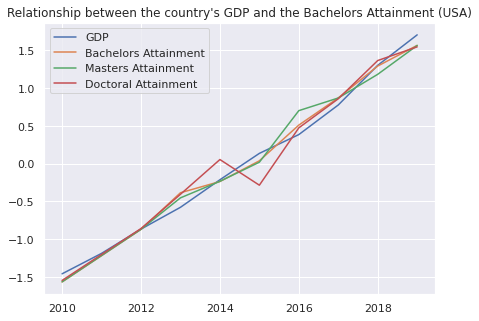

In [ ]:
plt.figure(figsize=(8, 8))
usa = df_viz[(df_viz['country_name'] == "United States") & (df_viz['Year'] >= 2010)]
standardizer = StandardScaler()
normalizer = Normalizer()
gdp_standardized = standardizer.fit_transform(usa['GDP'].to_numpy().reshape(-1, 1))
bach_standardized = standardizer.fit_transform(usa['BachelorsAttainment'].to_numpy().reshape(-1, 1))
mast_standardized = standardizer.fit_transform(usa['MastersAttainment'].to_numpy().reshape(-1, 1))
doct_standardized = standardizer.fit_transform(usa['DoctoralAttainment'].to_numpy().reshape(-1, 1))

plt.figure(figsize=(7,5))
plt.plot(usa["Year"], gdp_standardized, label="GDP", )
plt.plot(usa["Year"], bach_standardized, label="Bachelors Attainment")
plt.plot(usa["Year"], mast_standardized, label="Masters Attainment")
plt.plot(usa["Year"], doct_standardized, label="Doctoral Attainment")
plt.title("Relationship between the country's GDP and the Bachelors Attainment (USA)")
plt.legend()
plt.show()


### The following code is for a pair plot of all the features in our dataset.
The KDE plot shows us the trend along with the distribution of the data against each feature and the Scatter plot shows us the mere trend based on each feature.



*   We can clearly see that there is a positive correlation between all features as time progresses.
*   If we notice closely, we can identify that the `Educational attainments` against the `Year` in the scatter plot shows that the rate of increase in educational attainment has increased post 2015 after a period of slow increase. This is very prominent in the case of `DoctoralAttainment` - where there has been a drop during the `2014-2015` period. This could be interlinked to the effects on education due to the Great Recession.



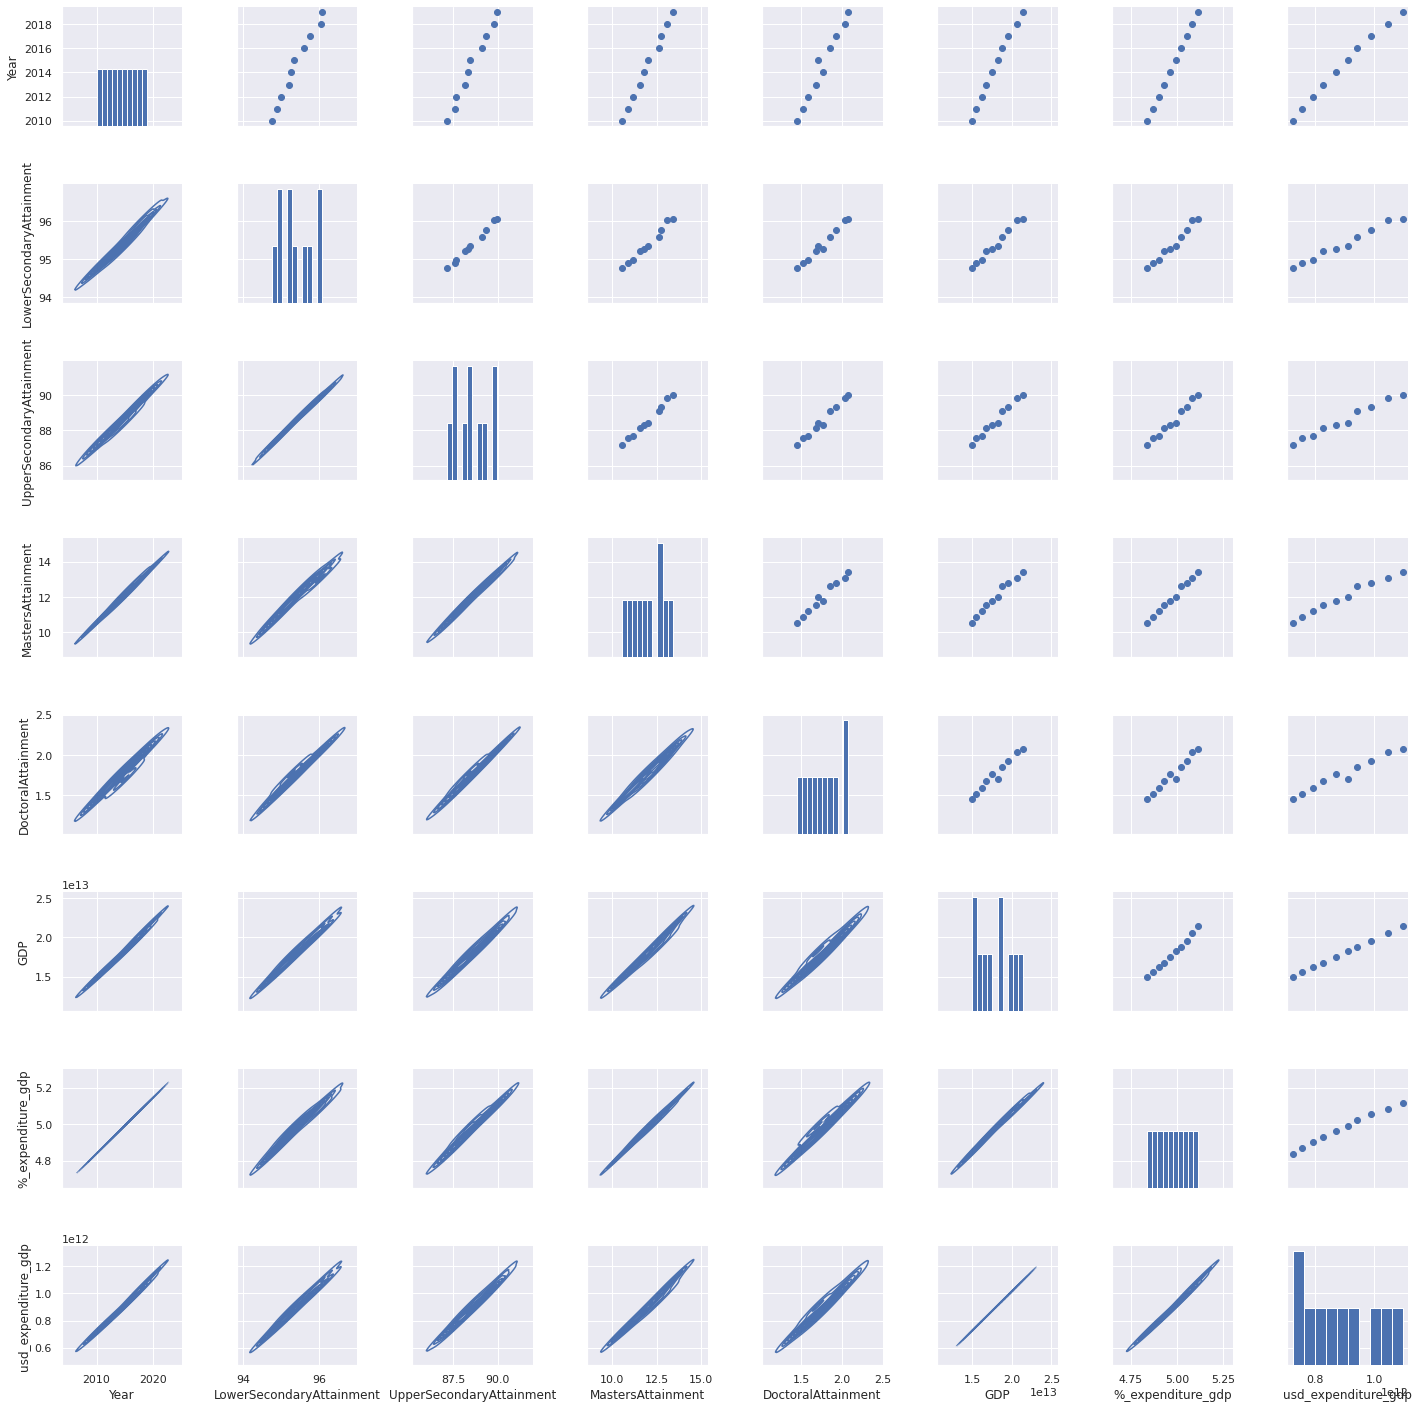

In [ ]:
g = sns.PairGrid(usa)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## **Comparision of GDP's correlation with educational attainments**

Here, we have a visualization that compares the GDP and the Bachelor's Attainment of two countries.


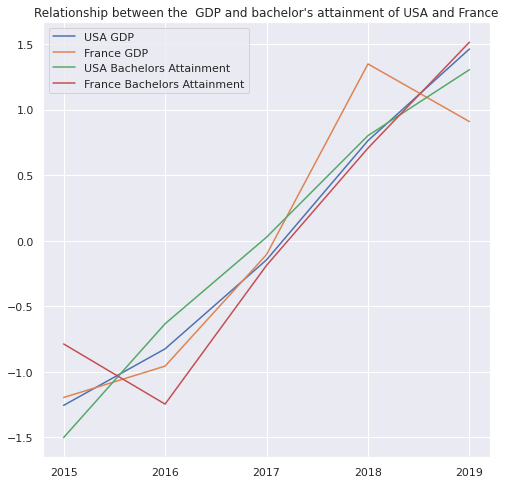

In [ ]:
plt.figure(figsize=(8, 8))
usa = df_viz[(df_viz['country_name'] == "United States") & (df_viz['Year'] > 2014)]
fran = df_viz[(df_viz['country_name']== "France") & (df_viz['Year'] > 2014)]
standardizer = StandardScaler()

usgdp_standardized = standardizer.fit_transform(usa['GDP'].to_numpy().reshape(-1, 1))
frangdp_standardized = standardizer.fit_transform(fran['GDP'].to_numpy().reshape(-1,1))
usbach_standardized = standardizer.fit_transform(usa['BachelorsAttainment'].to_numpy().reshape(-1, 1))
franbach_standardized = standardizer.fit_transform(fran['BachelorsAttainment'].to_numpy().reshape(-1, 1))
plt.plot(usa["Year"], usgdp_standardized, label="USA GDP")
plt.plot(fran["Year"], frangdp_standardized, label="France GDP")
plt.plot(usa["Year"], usbach_standardized, label="USA Bachelors Attainment")
plt.plot(fran["Year"], franbach_standardized, label="France Bachelors Attainment")
plt.title("Relationship between the  GDP and bachelor's attainment of USA and France")
plt.xticks(fran['Year'])
plt.legend()
plt.show()

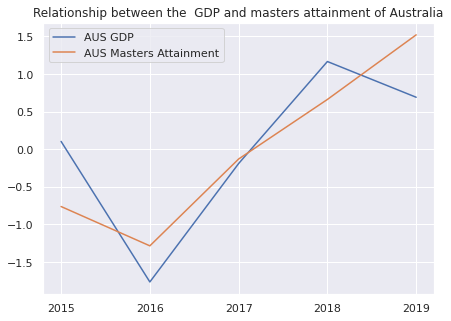

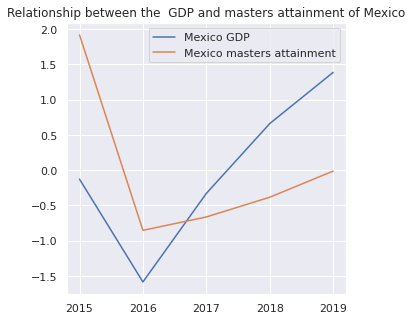

In [ ]:
aus = df_viz[(df_viz['country_name']== "Australia") & (df_viz['Year'] > 2014)]
mexico = df_viz[(df_viz['country_name']== "Mexico") & (df_viz['Year'] > 2014)]


ausgdp_standardized = standardizer.fit_transform(aus['GDP'].to_numpy().reshape(-1,1))
aus_mast_standardized = standardizer.fit_transform(aus['MastersAttainment'].to_numpy().reshape(-1, 1))
mexgdp_standardized = standardizer.fit_transform(mexico['GDP'].to_numpy().reshape(-1,1))
mex_mast_standardized = standardizer.fit_transform(mexico['MastersAttainment'].to_numpy().reshape(-1, 1))
plt.figure(figsize=(7,5))
plt.plot(aus["Year"], ausgdp_standardized, label="AUS GDP")
plt.plot(aus["Year"], aus_mast_standardized, label="AUS Masters Attainment")

plt.title("Relationship between the  GDP and masters attainment of Australia")
plt.xticks(aus['Year'])
plt.legend()
plt.show()
print()
plt.figure(figsize=(5,5))
plt.plot(mexico['Year'], mexgdp_standardized, label="Mexico GDP")
plt.plot(mexico['Year'], mex_mast_standardized, label="Mexico masters attainment")
plt.title("Relationship between the  GDP and masters attainment of Mexico")
plt.xticks(aus['Year'])
plt.legend()
plt.show()





>   In the above visualization, we notice that Australia's GDP has dropped from 2015 to 2016 along with the masters attainment and even so for the case of Mexico, but the rate of growth in attainment wasn't as swift as compared to australia. This could be due to other factors unconsidered factors.








In [ ]:
# Compare the top 10 doctoral attainment with the top 10 gdp countries to see if there is a match
gdp_2018 = df_viz[df_viz['Year'] == 2018]
country_list_gdp = list(gdp_2018.sort_values(by="GDP", ascending=False)['country_name'][:10])
country_list_doc = list(gdp_2018.sort_values(by="DoctoralAttainment", ascending=False)['country_name'][:10])
country_dict_gdp = dict()
country_dict_doc = dict()
for i in range(len(country_list_gdp)):
  country_dict_gdp[i] = country_list_gdp[i]

print("Countries with highest GDP (Descending) -", country_dict_gdp)
for i in range(len(country_list_doc)):
  country_dict_doc[i] = country_list_doc[i]
print("Countries with highest Doctoral diplomas (Descending) -", country_dict_doc)

print("Intersection -", set(country_list_gdp).intersection(set(country_list_doc)))

Countries with highest GDP (Descending) - {0: 'United States', 1: 'Germany', 2: 'France', 3: 'Australia', 4: 'Mexico', 5: 'Indonesia', 6: 'Netherlands', 7: 'Switzerland', 8: 'Sweden', 9: 'Belgium'}
Countries with highest Doctoral diplomas (Descending) - {0: 'Slovenia', 1: 'Switzerland', 2: 'United States', 3: 'Sweden', 4: 'Germany', 5: 'Finland', 6: 'Australia', 7: 'Latvia', 8: 'Norway', 9: 'Hungary'}
Intersection - {'United States', 'Germany', 'Switzerland', 'Sweden', 'Australia'}




>* 6 out of the top 10 countries with highest Doctoral attainents are from the top 10 GDP countries. This tells us that the higher the diploma the probability that the country has a high attainment rate is proportional to the country's economic standing.*



Text(0.5, 1.0, 'Distributions of Masters attainment vs year for top 7 gdp countries.')

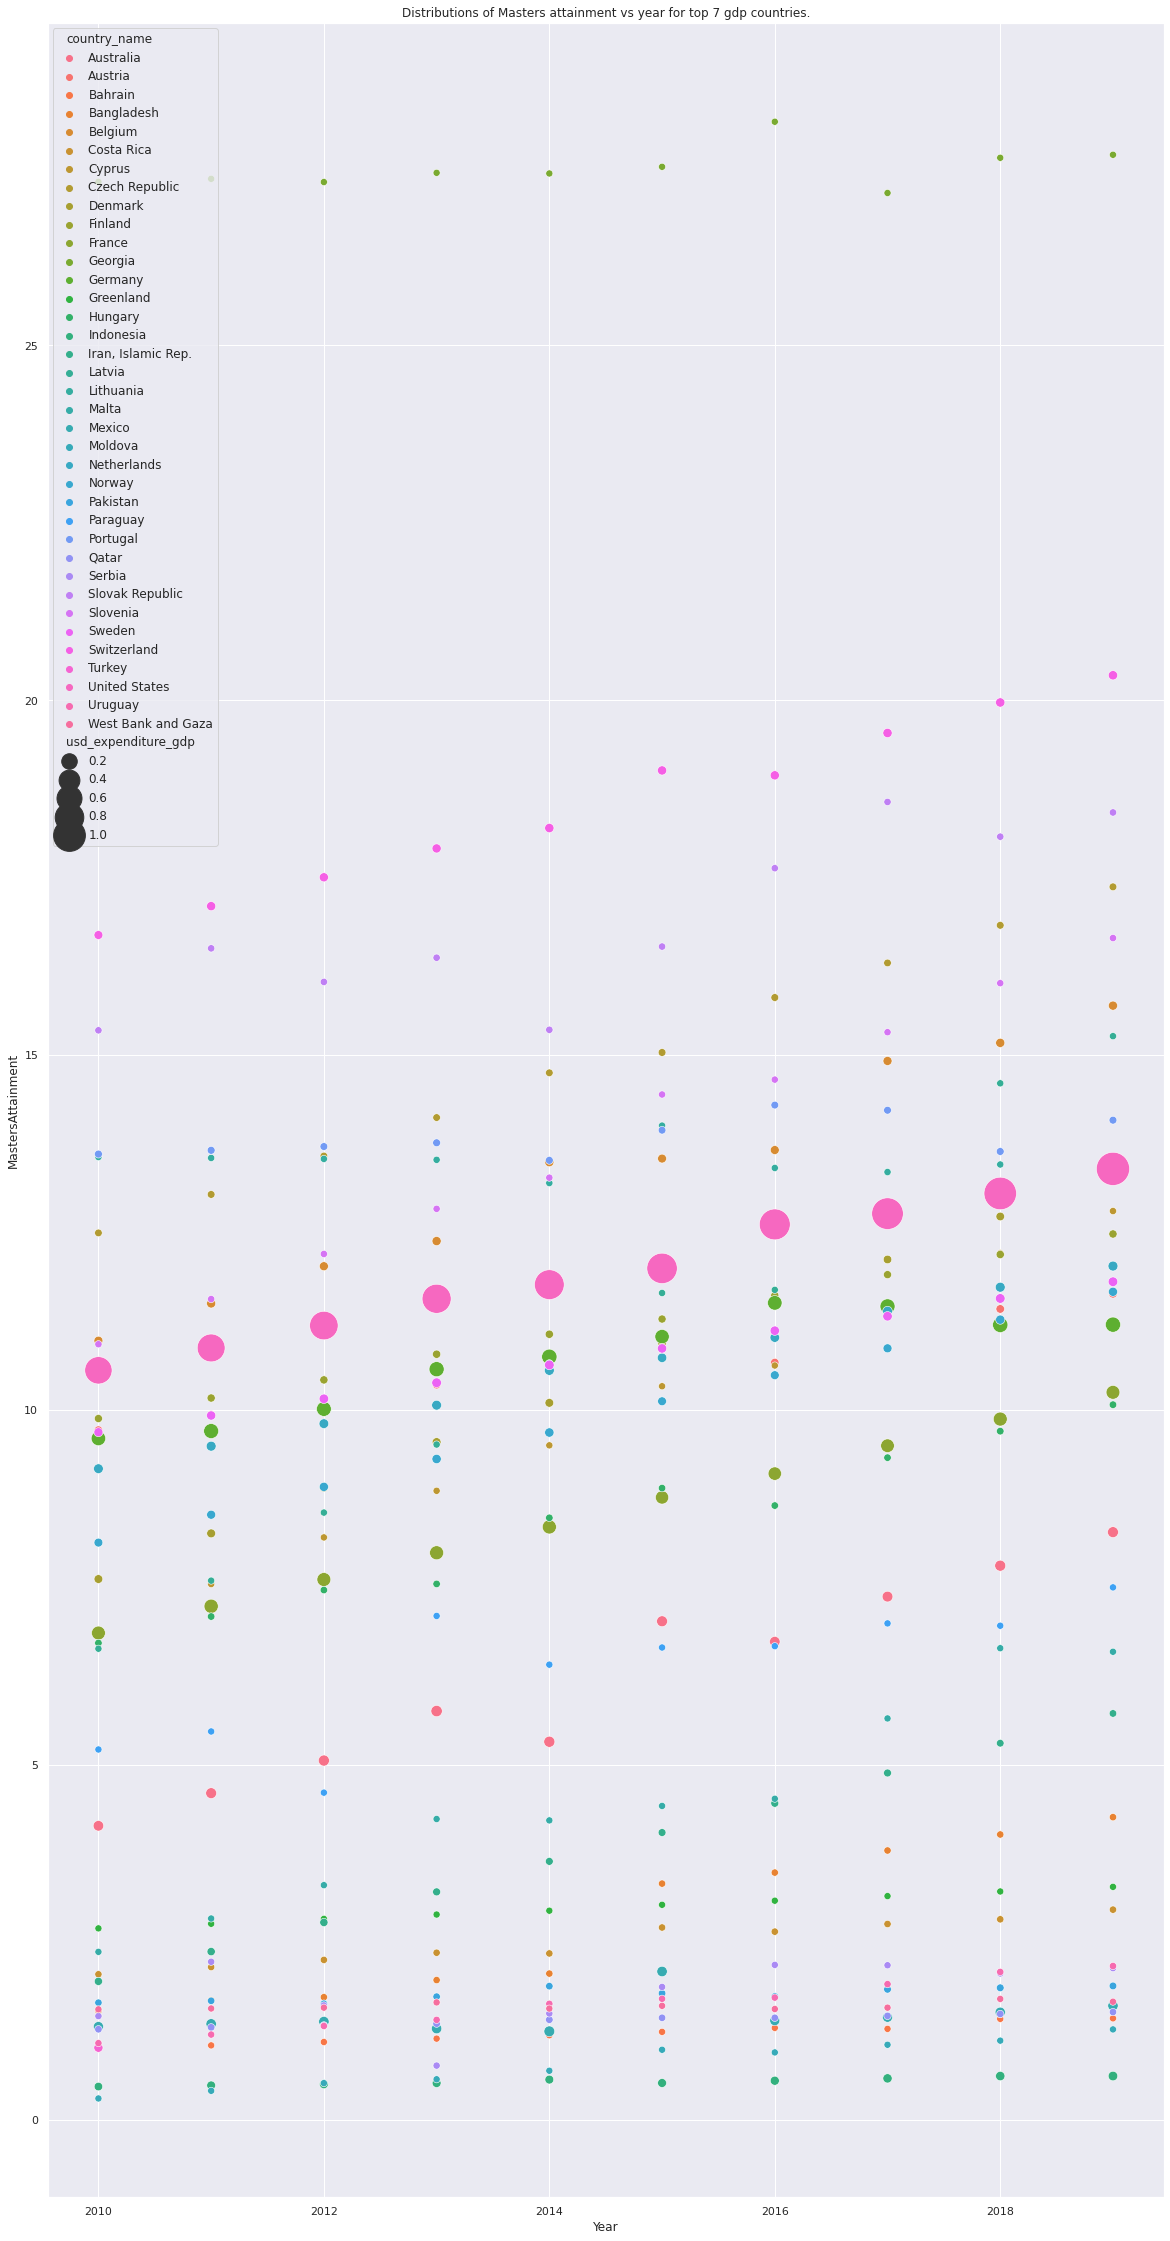

In [ ]:
# Scatter plot to shwo the distributions of attainment vs year 
country_list_gdp_7 = list(gdp_2018.sort_values(by="GDP", ascending=False)['country_name'][:7])
# top_7_gdp = df_viz['country_name'].isin(country_list_gdp_7)
sns.set(rc={'figure.figsize':(20,40)})
sns.scatterplot(x="Year", y="MastersAttainment", data = df_viz, hue='country_name', size="usd_expenditure_gdp", sizes=(50, 1100)).set_title("Distributions of Masters attainment vs year for top 7 gdp countries.")

This scatter plot shows the distributions of Doctoral attainment vs year for all countries. We can notice that the results are scattered without any correlation. So it may depend on various other socioeconomic factors like inflation, employment figures, poverty threshold, political landscapes and many more